In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Save CIFAR-10 numpy arrays to disk
os.makedirs('saved_data', exist_ok=True)
np.save('saved_data/x_train.npy', x_train)
np.save('saved_data/y_train.npy', y_train)
np.save('saved_data/x_test.npy', x_test)
np.save('saved_data/y_test.npy', y_test)
print("Saved CIFAR-10 dataset arrays to 'saved_data/' directory")

Saved CIFAR-10 dataset arrays to 'saved_data/' directory


In [5]:
# One-hot encode labels
num_classes = 10
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Define CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
history = model.fit(x_train, y_train_ohe, epochs=15, batch_size=64, validation_split=0.2, verbose=2)


Epoch 1/15
625/625 - 9s - 15ms/step - accuracy: 0.3508 - loss: 1.7610 - val_accuracy: 0.4965 - val_loss: 1.4059
Epoch 2/15
625/625 - 3s - 4ms/step - accuracy: 0.4792 - loss: 1.4292 - val_accuracy: 0.5789 - val_loss: 1.2037
Epoch 3/15
625/625 - 3s - 5ms/step - accuracy: 0.5392 - loss: 1.2852 - val_accuracy: 0.6298 - val_loss: 1.0576
Epoch 4/15
625/625 - 3s - 5ms/step - accuracy: 0.5814 - loss: 1.1737 - val_accuracy: 0.6547 - val_loss: 0.9865
Epoch 5/15
625/625 - 3s - 4ms/step - accuracy: 0.6091 - loss: 1.1028 - val_accuracy: 0.6665 - val_loss: 0.9384
Epoch 6/15
625/625 - 3s - 4ms/step - accuracy: 0.6369 - loss: 1.0315 - val_accuracy: 0.6908 - val_loss: 0.8985
Epoch 7/15
625/625 - 3s - 4ms/step - accuracy: 0.6547 - loss: 0.9771 - val_accuracy: 0.6946 - val_loss: 0.8789
Epoch 8/15
625/625 - 3s - 5ms/step - accuracy: 0.6693 - loss: 0.9255 - val_accuracy: 0.7184 - val_loss: 0.8307
Epoch 9/15
625/625 - 3s - 5ms/step - accuracy: 0.6855 - loss: 0.8889 - val_accuracy: 0.7206 - val_loss: 0.8205


In [8]:
# Save model to disk
os.makedirs('saved_model', exist_ok=True)
model.save('saved_model/cifar10_cnn_model.h5')
print("Saved trained model to 'saved_model/cifar10_cnn_model.h5'")

Saved trained model to 'saved_model/cifar10_cnn_model.h5'


In [9]:
# Evaluate and print test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_ohe, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.729


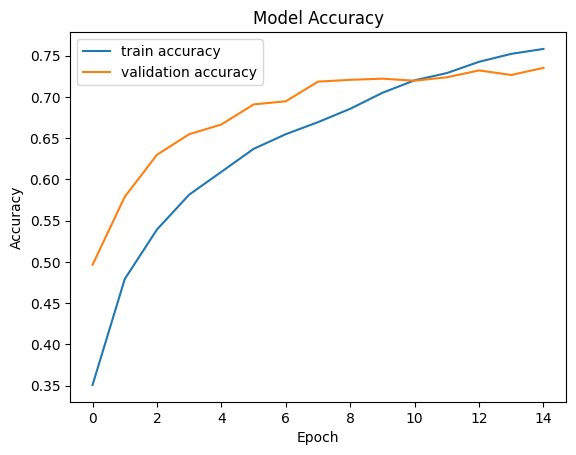

Saved accuracy plot as 'saved_model/training_validation_accuracy.png'


In [10]:
# Plot training and validation accuracy and save the figure
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.savefig('saved_model/training_validation_accuracy.png')
plt.show()
print("Saved accuracy plot as 'saved_model/training_validation_accuracy.png'")